# <h1> Import dataset

In [1]:
# link dataset: https://data.cityofnewyork.us/Transportation/2020-Green-Taxi-Trip-Data/pkmi-4kfn
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path="/content/drive/MyDrive/DS105/Do_An/"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df=pd.read_csv(path+"dataset/2020_Green_Taxi_Trip_Data.csv")

<ipython-input-4-2bf463c0b7df>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path+"dataset/2020_Green_Taxi_Trip_Data.csv")


##  <h2>2.1 Xử lí dữ liệu khuyết  và các dữ liệu bất thường </h2>

In [5]:
# tiến hành loại bỏ thuộc tính ehail_fee
df_drop=df.drop("ehail_fee",axis=1)

In [6]:
df_drop.dtypes

VendorID                 float64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

###  <h3> 2.1.1: Xử lí các giá trị bất thường </h3>

In [7]:
#tên cột có thuộc tính bị khuyết
null_name=['VendorID','store_and_fwd_flag','passenger_count',"payment_type","trip_type","congestion_surcharge","RatecodeID"]

In [8]:
#tên cột không có thuộc tính bị khuyết
non_null=df_drop.columns[~df_drop.columns.isin(null_name)]

In [9]:
#chọn ra những tên cột có loại dữ liệu là numeric
numeric=df_drop.select_dtypes(["int64","float64"]).columns

In [10]:
#chọn ra những tên cột có loại dữ liệu là numeric và không khuyết dữ liệu
nn_numeric=non_null.intersection(numeric)
nn_numeric

Index(['PULocationID', 'DOLocationID', 'trip_distance', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],
      dtype='object')

In [11]:
cont_col=['fare_amount','extra','tip_amount','tolls_amount','total_amount','trip_distance']

In [12]:
cat_col=numeric.difference(cont_col)
cat_col

Index(['DOLocationID', 'PULocationID', 'RatecodeID', 'VendorID',
       'congestion_surcharge', 'improvement_surcharge', 'mta_tax',
       'passenger_count', 'payment_type', 'trip_type'],
      dtype='object')

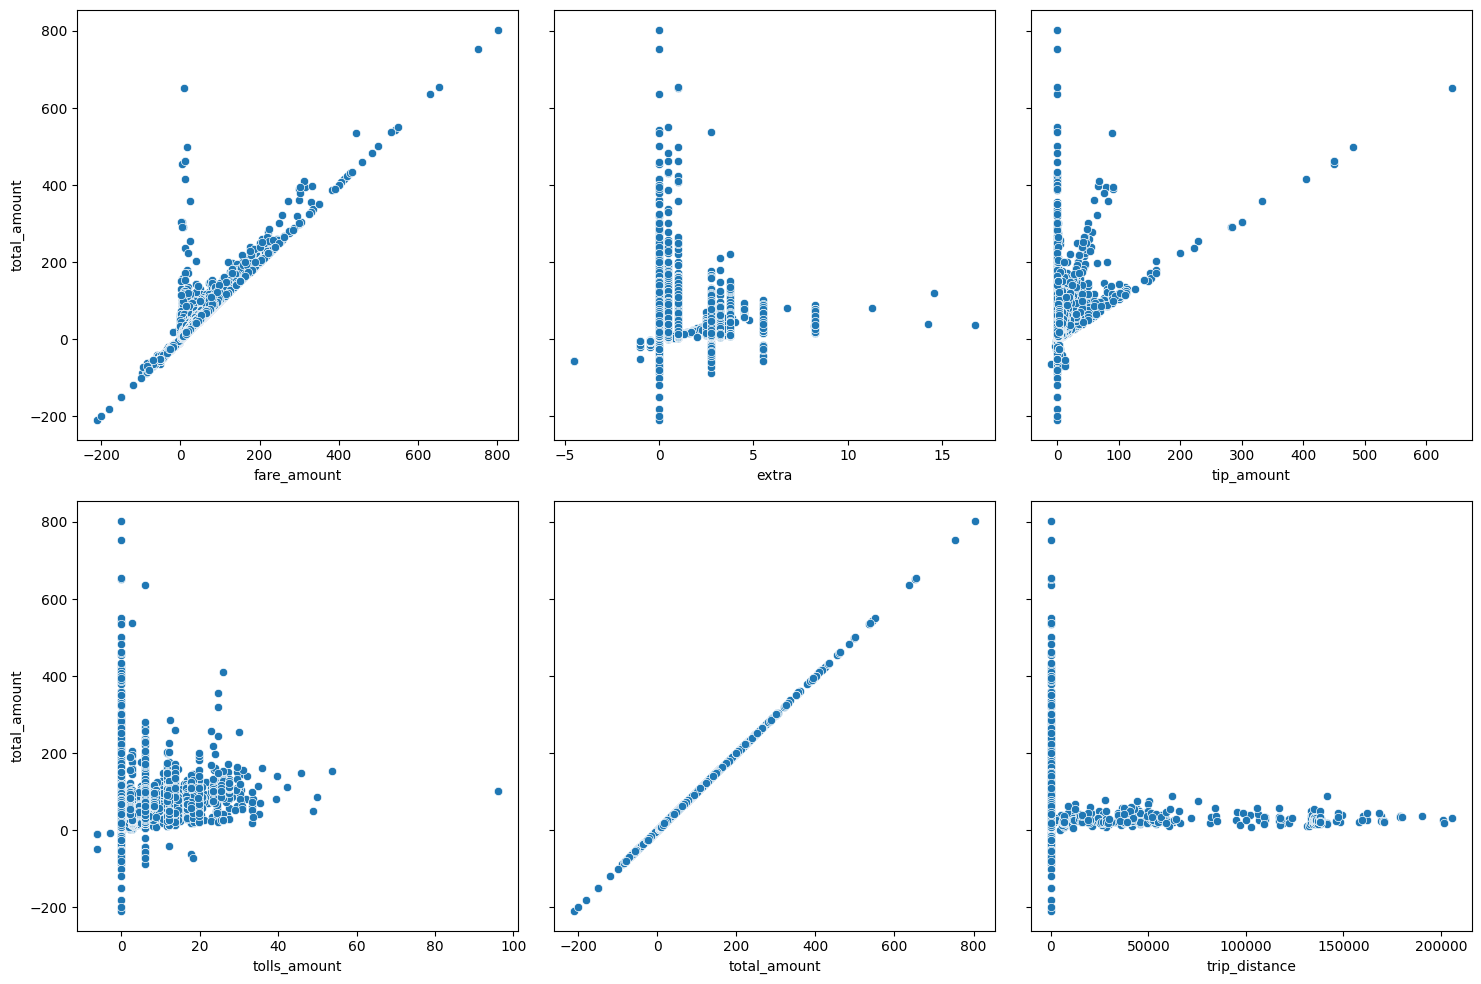

In [13]:
f,ax=plt.subplots(round(len(cont_col)/3),3,figsize=(15,10),sharey=True)
for i,a in zip(cont_col,ax.flat):
  sns.set(rc = {'figure.figsize':(15,10)})
  sns.scatterplot(x=i,y="total_amount",data=df_drop,ax=a)

plt.tight_layout()
plt.show()
f.savefig(path+"picture/visualizing scatterplot total_amounts vs Continuous variable")

Sau khi scatterplot giữa total_amount với các cột 'fare_amount','extra','tip_amount','tolls_amount','total_amount','trip_distance' thì ta thấy một số điểm <br>
- fare_amount, total_amount, extra xuất hiện các giá trị âm sẽ không có ý nghĩa trong quá trình EDA => tiến hành loại bỏ <br>
- fare_amount, tip_amount có quan hệ tuyến tính thuận với total_amount có thể quan sát được
- Tuy trip_distance xuất hiện giá trị 0 tuy nhiên do mức độ phân tán trải đều đối  với total_amount => giữ lại để eda

In [14]:
len(cat_col)

10

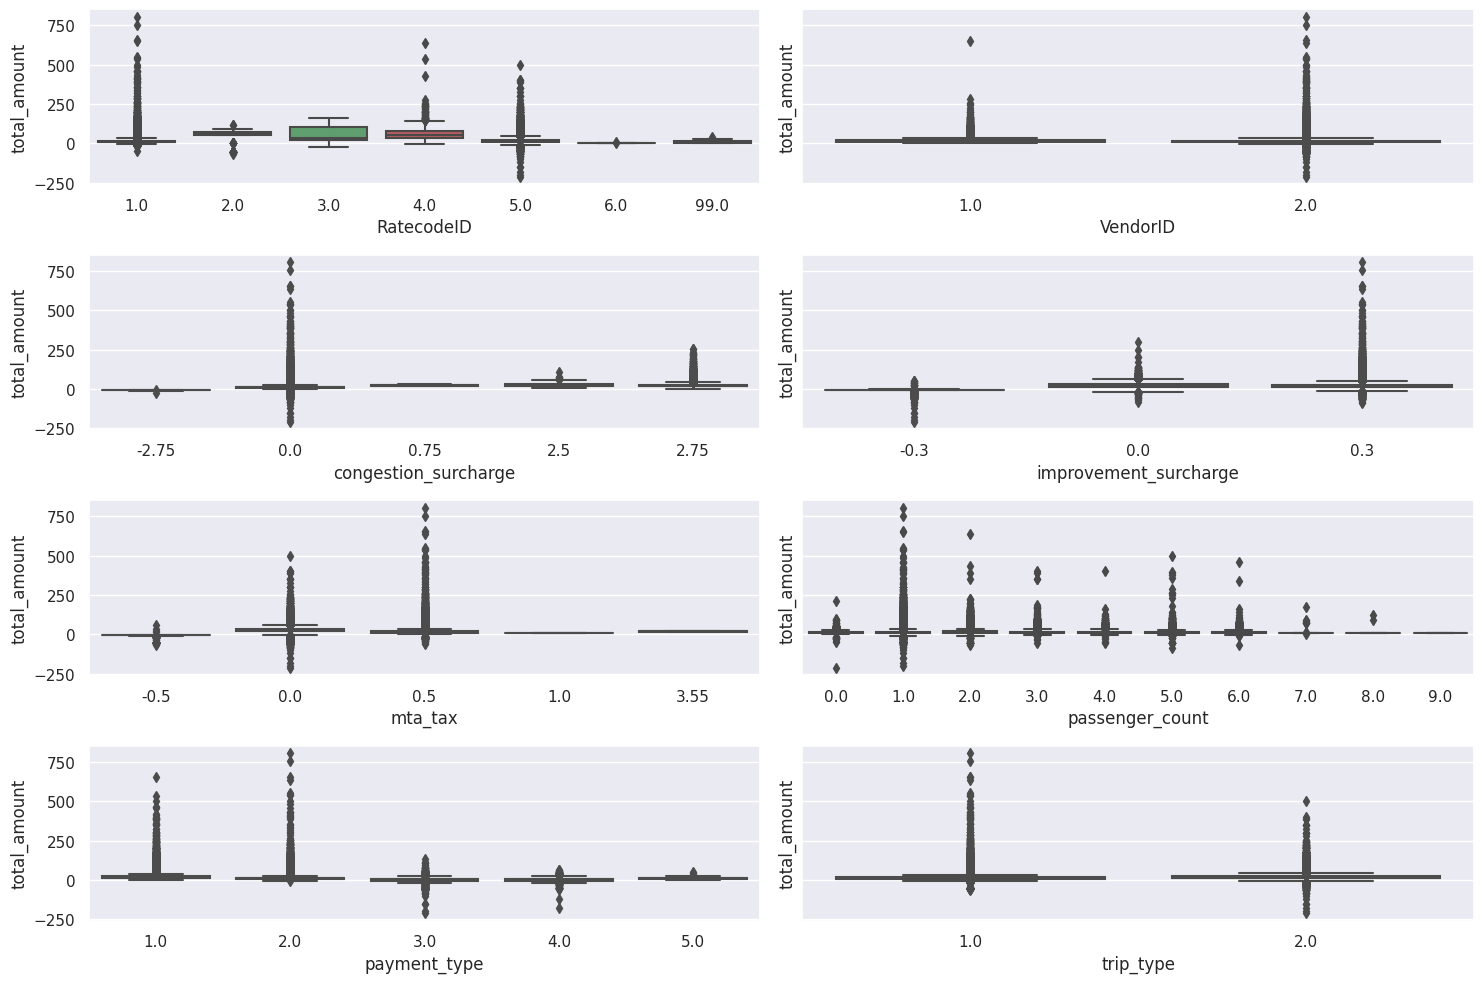

In [15]:
f,ax=plt.subplots(round(len(cat_col[2:])/2),2,figsize=(15,10),sharey=True)
for i,a in zip(cat_col[2:],ax.flat):
  sns.set(rc = {'figure.figsize':(15,10)})
  sns.boxplot(x=i,y="total_amount",data=df_drop,ax=a)

plt.tight_layout()
plt.show()
f.savefig(path+"picture/visuaizing boxplot between total_amount vs Categorical variable")

Sau khi boxplot giữa total_amount với các cột  thì ta thấy một số điểm 'RatecodeID', 'improvement_surcharge','mta_tax',  ta có thể nhận xét: <br>

- improvement_surcharge,mta_tax,congestion xuất hiện các giá trị âm sẽ không có ý nghĩa trong quá trình EDA => tiến hành loại bỏ <br>
- RatecodeId,passenger_count và mta_tax xuất hiện những giá trị bất thường lần lượt là 99; 0 và 3.55 => tiến hành tìm hiểu thêm => đề xuất loại bỏ hoặc thay thế bằng giá trị xuất hiện nhiều nhất <br>





In [16]:
df_remove=df_drop.copy()

In [17]:
def check_neg(data):
  numeric=data.select_dtypes(["int64","float64"]).columns
  col=[]
  for i in numeric:
    if (data[i] < 0).any(skipna=True) == True:
        col.append(i)
  return col


In [18]:
#loại bỏ các hàng chứa giá trị âm:
# df_remove=df_remove.drop(df_remove[df_remove.total_amount < 0].index,axis=0)
# df_remove=df_remove.drop(df_remove[df_remove.fare_amount < 0].index,axis=0)
# df_remove=df_remove.drop(df_remove[df_remove.extra < 0].index,axis=0)
# df_remove = df_remove.drop(df_remove[df_remove.improvement_surcharge< 0].index,axis=0)
# df_remove = df_remove.drop(df_remove[df_remove.mta_tax< 0].index,axis=0)

In [19]:
neg_col=check_neg(df_remove)
for i in neg_col:
  df_remove=df_remove.drop(df_remove[df_remove[i] < 0].index,axis=0)

In [20]:
#quan sát mta_tax = 3.55
df_remove[df_remove.mta_tax == 3.55]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
4050,1.0,01/01/2020 10:58:27 AM,01/01/2020 10:58:27 AM,N,1.0,107,107,2.0,4.5,15.5,2.75,3.55,2.5,0.0,0.0,24.30,1.0,1.0,2.75
121595,1.0,01/12/2020 06:36:33 PM,01/12/2020 06:36:37 PM,Y,1.0,211,211,1.0,3.5,17.5,2.75,3.55,0.0,0.0,0.0,23.80,2.0,1.0,2.75
186008,1.0,01/18/2020 02:13:47 PM,01/18/2020 02:13:49 PM,N,1.0,263,263,1.0,2.6,11.0,2.75,3.55,2.0,0.0,0.0,19.30,1.0,1.0,2.75
294646,1.0,01/28/2020 07:16:01 PM,01/28/2020 07:16:07 PM,N,1.0,232,232,1.0,2.3,13.0,3.75,3.55,0.0,0.0,0.0,20.30,4.0,1.0,2.75
609251,1.0,02/15/2020 03:09:32 PM,02/15/2020 03:09:32 PM,Y,1.0,144,264,1.0,0.0,14.0,2.75,3.55,0.0,0.0,0.0,20.30,2.0,1.0,2.75
1022078,1.0,03/31/2020 09:42:33 AM,03/31/2020 09:42:35 AM,N,1.0,236,236,1.0,2.4,9.0,2.75,3.55,0.0,0.0,0.0,15.30,1.0,1.0,2.75
1123044,1.0,05/19/2020 10:31:29 AM,05/19/2020 10:43:31 AM,N,1.0,74,140,1.0,3.6,13.5,0.00,3.55,0.0,0.0,0.0,17.05,1.0,1.0,0.00
1178213,1.0,06/13/2020 10:59:11 AM,06/13/2020 11:04:10 AM,N,1.0,236,75,1.0,0.6,5.0,3.75,3.55,0.0,0.0,0.0,12.30,2.0,1.0,2.75
1401772,1.0,09/15/2020 09:22:21 AM,09/15/2020 09:22:21 AM,Y,1.0,237,264,1.0,0.0,13.0,2.75,3.55,0.0,0.0,0.0,19.30,2.0,1.0,2.75


In [21]:
#vì số lượng outlier thấy =9 nên ta có thể tiến hành loại bỏ mta_tax = 3.55 vì không gây ảnh hưởng quá lớn
df_remove=df_remove.drop(df_remove[df_remove.mta_tax == 3.55].index,axis=0)

In [22]:
#quan sát RatecodeID = 99.0
df_remove[df_remove.RatecodeID == 99.0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
5453,2.0,01/01/2020 03:55:14 PM,01/01/2020 05:38:46 PM,N,99.0,264,264,1.0,0.0,2.50,0.8,0.5,0.0,0.0,0.0,3.80,2.0,1.0,0.0
19321,1.0,01/03/2020 07:35:44 AM,01/03/2020 07:35:44 AM,Y,99.0,60,264,0.0,0.0,15.00,0.0,0.0,0.0,0.0,0.0,15.00,3.0,NaN,0.0
472025,1.0,02/03/2020 11:19:29 AM,02/03/2020 11:19:29 AM,N,99.0,264,264,0.0,0.0,23.00,0.0,0.0,4.7,0.0,0.3,28.00,1.0,NaN,0.0
516951,2.0,02/07/2020 01:57:50 PM,02/07/2020 02:02:38 PM,N,99.0,193,193,1.0,0.0,2.50,0.8,0.5,0.0,0.0,0.0,3.80,2.0,1.0,0.0
956883,1.0,03/11/2020 06:44:03 PM,03/11/2020 06:44:03 PM,Y,99.0,264,264,0.0,0.0,8.58,0.0,0.0,0.0,0.0,0.0,8.58,3.0,NaN,0.0
1255081,1.0,07/22/2020 03:23:16 PM,07/22/2020 04:20:00 PM,Y,99.0,61,264,0.0,0.0,41.20,0.0,0.5,0.0,0.0,0.3,42.00,3.0,NaN,0.0
1256668,1.0,07/23/2020 04:07:36 PM,07/23/2020 04:07:36 PM,Y,99.0,65,264,0.0,0.0,13.43,0.0,0.0,0.0,0.0,0.0,13.43,1.0,NaN,0.0
1513072,2.0,10/28/2020 01:10:46 PM,10/29/2020 02:22:10 PM,N,99.0,264,193,1.0,0.0,2.50,0.8,0.5,0.0,0.0,0.0,3.80,2.0,1.0,0.0


In [23]:
#tương tự như trên
df_remove=df_remove.drop(df_remove[df_remove.RatecodeID == 99.0].index,axis=0)

In [24]:
#thay giá trị 0 bằng giá trị xuất hiện nhiều nhất trong passenger_count
df_remove.passenger_count=df_remove.passenger_count.replace(to_replace=0.0,value=df_remove.passenger_count.mode()[0])

In [25]:
df_remove.passenger_count.mode()[0]

1.0

In [26]:
#số hàng đã được loại bỏ
df_drop.shape[0] - df_remove.shape[0]

5278

In [27]:
#kiểm tra lại df có giá trị âm không
after=check_neg(df_remove)
len(after)

0

### <h2> 2.1.2 Xử lí các giá trị khuyết </h2>

In [28]:
null_name

['VendorID',
 'store_and_fwd_flag',
 'passenger_count',
 'payment_type',
 'trip_type',
 'congestion_surcharge',
 'RatecodeID']

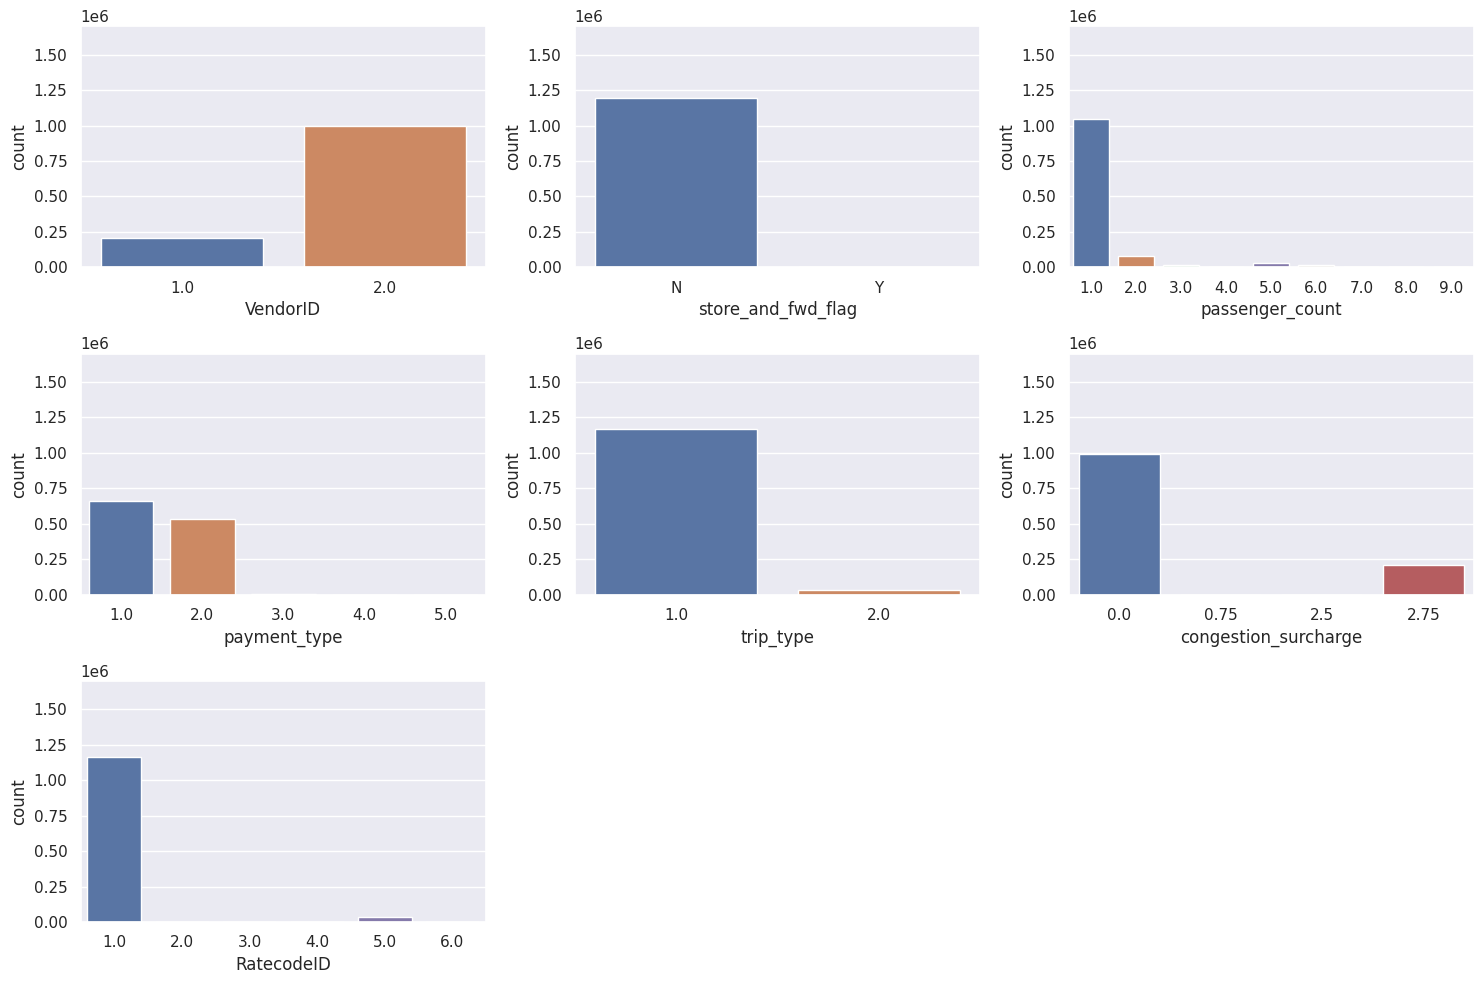

In [29]:
#biểu diễn trực quan các cột khuyết dữ liệu

f=plt.figure(figsize=(15,10))
for i,col in enumerate(null_name):
  ax=f.add_subplot(331+i)
  sns.set(rc = {'figure.figsize':(8,8)})
  sns.countplot(x=col,data=df_remove)
  ax.set_ylim(0,1.7e6)

plt.tight_layout()
plt.show()
f.savefig(path+"picture/visualizing countplots have missing data.png",dpi=100)

- Từ hình ảnh trực quan trên đã cho thấy giá trị VendorID = 2 xuất hiện nhiều nhất và giá trị store_and_fwd_flag = N chiếm gần như bộ dữ liệu, passenger_count chiếm phần lớn trong bộ dữ liệu, tương tự đối với trip_type, congestion_surcharge, RatecodeID => tiến hành thay thế giá trị khuyết bằng các giá trị xuất hiện nhiều nhất. <br>
- payment_type ta thấy giá trị 1.0 và 2.0 có phần trăm tỉ lệ không quá chênh lệch sau khi quan sát countplot (đúng với thực tế vì 2 giá trị đại diện lần lượt cho 2 phương thức thanh toán phổ biến là: thẻ tín dụng - credit card, cash - tiền mặt) => tiến hành thay thế dữ liệu khuyết bằng cách lấy ngẫu nhiên hai giá trị:  1.0 và 2.0





In [30]:
#hàm xử lí missing bằng simpleimputer
def fill_nan(dataframe,by):
  from sklearn.impute import SimpleImputer
  imp= SimpleImputer(missing_values=np.nan, strategy=by)
  dataframe= imp.fit_transform(dataframe.values.reshape(-1,1))[:,0]
  return dataframe

### 2.1.3 Tiền hành decode các thuộc tính phân loại

In [31]:
#tiến hành thay các giá trị NaN trên 'VendorID','store_and_fwd_flag','passenger_count', 'trip_type', 'congestion_surcharge'
for col in ['VendorID','store_and_fwd_flag','passenger_count', 'trip_type', 'congestion_surcharge','RatecodeID']:
  df_remove[col]=fill_nan(df_remove[col],"most_frequent")

In [32]:
#tiến hành thay các giá trị NaN trên payment_type
df_remove.payment_type=df_remove.payment_type.replace(to_replace=np.nan,value=np.random.choice([1.0,2.0]))

In [33]:
#kiểm tra dataframe có dữ liệu khuyết không
df_remove.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

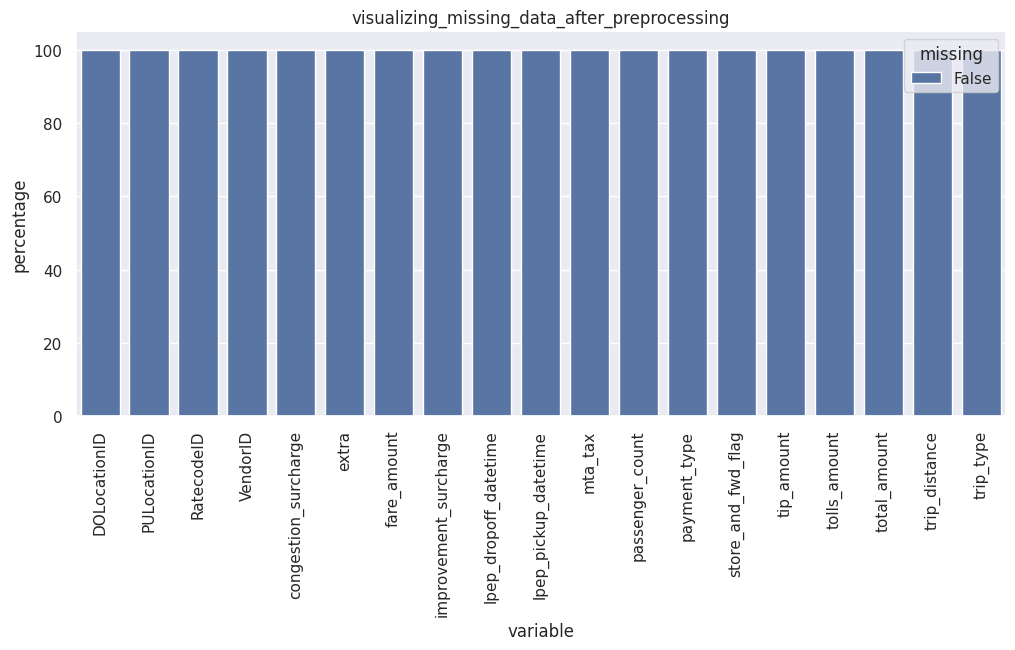

In [34]:
df_missing=df_remove.isna().melt(value_name="missing")
df_missing=(df_missing.groupby(['variable'])['missing']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index())
sns.set(rc={'figure.figsize':(12,5)})
plot=sns.barplot(
    data=df_missing,
    x="variable",
    y='percentage',
    hue="missing",
)
plt.xticks(rotation=90)
plt.title("visualizing_missing_data_after_preprocessing")
plt.show()
fig=plot.get_figure()
fig.savefig(path+"picture/visualizing_missing_data_after_preprocessing.png", dpi=100)

In [35]:
df_remove.head(1)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,12/18/2019 03:52:30 PM,12/18/2019 03:54:39 PM,N,1.0,264,264,5.0,0.0,3.5,0.5,0.5,0.01,0.0,0.3,4.81,1.0,1.0,0.0


In [36]:
#lưu lại dataset
df_remove.to_csv(path+"dataset/df_drop.csv",index=False)

### 2.1.3 Thực hiện decode (giải mã) các thuộc tính phân loại

In [47]:
#Thực hiện encoder cho những cột thuộc tính có giá trị nhị phân:store_and_fwd_flag,improvement_surcharge
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['store_and_fwd_flag','improvement_surcharge']:
  if df_remove[i].dtype != np.int64:
    df_remove[i]=le.fit_transform(df_remove[i])

In [48]:
#chuyển kiểu dữ liệu
for i in ['VendorID','RatecodeID','passenger_count','payment_type','trip_type']:
  df_remove[i]=df_remove[i].astype("int64")

In [49]:
#kiểm tra lại kiểu dữ liệu
df_remove.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag         int64
RatecodeID                 int64
PULocationID               int64
DOLocationID               int64
passenger_count            int64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge      int64
total_amount             float64
payment_type               int64
trip_type                  int64
congestion_surcharge     float64
dtype: object

In [50]:
set(df_remove.VendorID)

{1, 2}

In [51]:
for i in df_remove.columns[3:]:
  print(f'column: {i}, set values: {set(df_remove[i])}')

column: store_and_fwd_flag, set values: {0, 1}
column: RatecodeID, set values: {1, 2, 3, 4, 5, 6}
column: PULocationID, set values: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 

In [52]:
df_remove.to_csv(path+"dataset/df_step2.csv",index=False)